In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kneed

In [303]:
df_clust= pd.read_csv("/content/drive/MyDrive/ML/MLA3/DataClustering.csv")
df_pca=pd.read_csv('/content/drive/MyDrive/ML/MLA3/DataPCA.csv')
df_kpca=pd.read_csv('/content/drive/MyDrive/ML/MLA3/DataKPCA.csv')

# **Part 1**

In [304]:
df_clust.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


In [305]:
#unique and null values 
for col in df_clust.columns.values:
  list_vals = pd.unique(df_clust[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(df_clust[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(df_clust[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 351 unique values, 0 null entries and datatype float64
x2 has 351 unique values, 0 null entries and datatype float64
x3 has 351 unique values, 0 null entries and datatype float64
x4 has 351 unique values, 0 null entries and datatype float64


In [306]:
df_clust.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


##Observation 
Total columns 4, 351 rows, small dataset\
Data has the unique values \
All the values are in float format and are positives \
No null present \


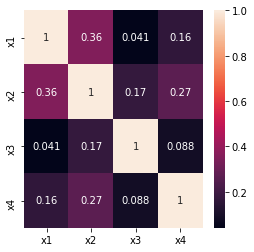

In [307]:
# visualization of correlation 

corr = df_clust.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(abs(corr), annot = True)
plt.show()

##Obs
All the collumns have very less correlation  \
$\therefore$ No dropping on the basis of the correlation

reference for data preprocessing [here](https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932)

##Visualisation of the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


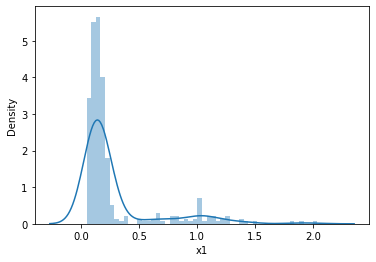

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


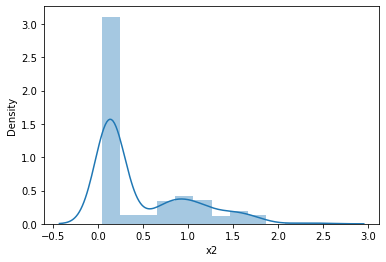

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


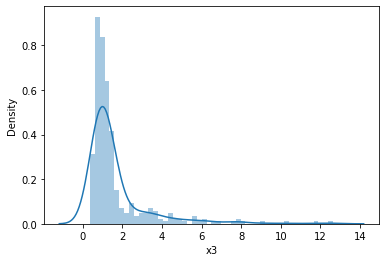

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


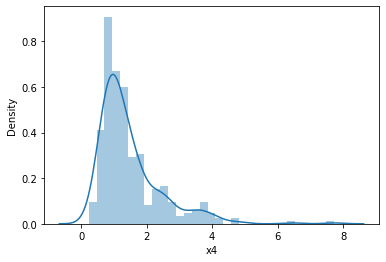

In [308]:
#Visualised data 
import seaborn as sns
from matplotlib import pyplot as plt
for col in df_clust.columns.values:
  sns.distplot(df_clust[col])
  plt.show()

##Observaton of the data regarding distribution and potential furthur operation
*x1 , x2 are somewhat distributed as bimodal \
*where as x3 , x4 as unimodal data distribution \
*as the data is concentrated in the left side so we can use the log for spreading  \
*xi having the left skewed distribution for the data for  $i \epsilon 1,2,3,4$ 




**References** \
reference1 [here](https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932) \
reference 2 [here](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html) \
reference3 [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


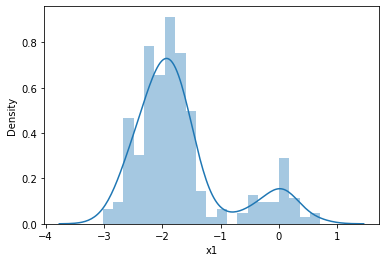

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


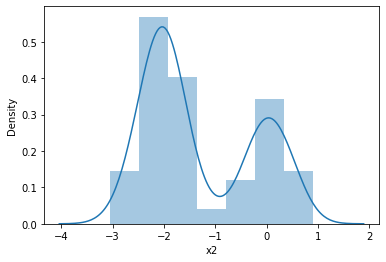

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


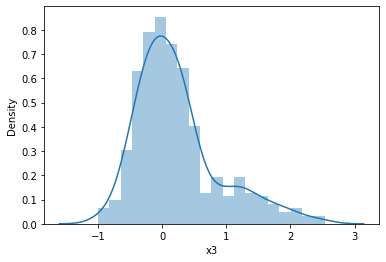

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


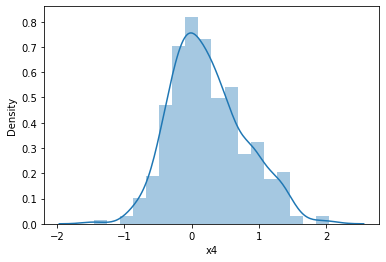

In [309]:
#Data transformation
import numpy as np
df_clust_transformed= np.log(df_clust)
for col in df_clust_transformed.columns.values:
  sns.distplot(df_clust_transformed[col])
  plt.show() #checking data is the skewnwss is been resolved 

<Figure size 432x288 with 0 Axes>

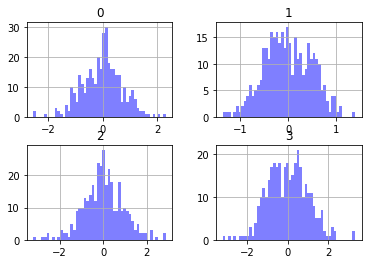

In [310]:
#Data Normalisation using standard scaler

# Normalizing the data

from sklearn import preprocessing

x = df_clust_transformed
scaler = preprocessing.StandardScaler()
df_clust_trans_scaled = scaler.fit_transform(x)
df_clust_trans_scaled=pd.DataFrame(df_clust_trans_scaled)
#check
#Data preprocessing #Normalisation centering of the graph
plt.figure()
df_clust_trans_scaled.diff().hist(color="b", alpha=0.5, bins=50);

In [311]:
#Applying the k mean clustering clustering and tuning of the k hyperparameter
X=df_clust_trans_scaled
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
intra_clust_distances=[] # intra cluster distances are the distances between the centroids of the different clusteres
distortions=[]
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(df_clust_trans_scaled)
    intra_clust_distances.append(clustering.inertia_)
    distortions.append(sum(np.min(cdist(X, clustering.cluster_centers_,'euclidean'), axis=1)) /X .shape[0])
#inertia is calculaing min intra cluster distance


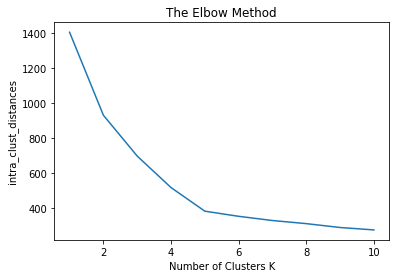

In [312]:
#hyperparameter checking using elbow method
plt.plot(range(1,11), intra_clust_distances)
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters K')
plt.ylabel('intra_clust_distances')
plt.show() #Checking the appropriate K value

From above K vs inertia graph we get that the optimal k is at either 5 or 4 \
Considering it as 5

In [313]:
#predict the labels of clusters.
km=KMeans(n_clusters=5,init='k-means++',random_state=0)
label = km.fit_predict(X)
y=label

In [314]:
y1=X[label==0];y2=X[label==1];y3=X[label==2];y4=X[label==3];y5=X[label==4];

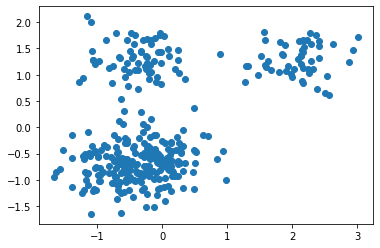

In [315]:
#original distributon of data
plt.scatter(X[0],X[1])

##Plotting Kmeans using matplotlib

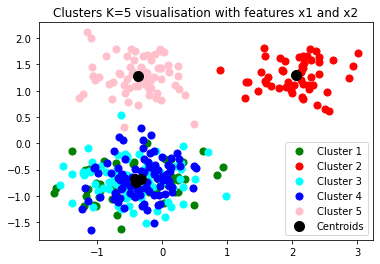

In [316]:
#distribution of data after clustering
plt.scatter(y1[0],y1[1], s=50, c='green', label ='Cluster 1')
plt.scatter(y2[0],y2[1], s=50, c='red', label ='Cluster 2')
plt.scatter(y3[0],y3[1], s=50, c='cyan', label ='Cluster 3')
plt.scatter(y4[0],y4[1], s=50, c='blue', label ='Cluster 4')
plt.scatter(y5[0],y5[1], s=50, c='pink', label ='Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.legend()
plt.title('Clusters K=5 visualisation with features x1 and x2')
plt.show()

##DBSCAN clustering

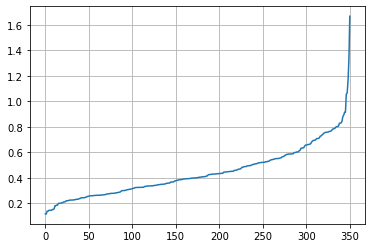

In [317]:
#Check with DBscan

#Step 1. epsilon hyperparameter tuning
#Using the elbow point i.e. the point of the maximum curvature
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.plot(distances)
indices[:,1].shape
plt.plot(indices[:,0], distances)
plt.grid()

**R**eference [here](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-**3100091cfbc**)

In [341]:
##interpretation of the epsilon
from kneed import KneeLocator
kn = KneeLocator(indices[:,0], distances, curve='convex', direction='increasing')
#import scipy.interpolate as interp  
#np.interp(kn.knee,indices[:,0], distances) #this gives the corrosponding $\epsilon$ value corrosponding to indice

##hyperparameters for DBSCAN
Generally, MinPts should be greater than or equal to the dimensionality of the data set [ref](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) \
as the epsilon is been decided by using the NearestNeigh of two pts optimum value

In [319]:
##Clustering using the DBSCAN
m = DBSCAN(eps=0.6, min_samples=4)
label_db = m.fit_predict(X)
np.unique(label_db) # checking the no

array([-1,  0,  1,  2,  3,  4])

## 5 clusters same as k means are obtained by $\epsilon=0.6$ and min samples=4

##Plotting DBSCAN using matplotlib

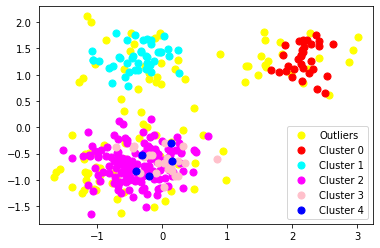

In [320]:
y1=X[label_db==-1];y2=X[label_db==0];y3=X[label_db==1];y4=X[label_db==2];y5=X[label_db==3];y6=X[label_db==4]
plt.scatter(y1[0],y1[1], s=50, c='yellow', label ='Outliers')
plt.scatter(y2[0],y2[1], s=50, c='red', label ='Cluster 0')
plt.scatter(y3[0],y3[1], s=50, c='cyan', label ='Cluster 1')
plt.scatter(y4[0],y4[1], s=50, c='magenta', label ='Cluster 2')
plt.scatter(y5[0],y5[1], s=50, c='pink', label ='Cluster 3')
plt.scatter(y6[0],y6[1], s=50, c='blue', label ='Cluster 4')
plt.legend()
plt.show()

##Plotting Using t-sne of KMeans and DBSCAN

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.001s...
[t-SNE] Computed neighbors for 351 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.628714
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.797516
[t-SNE] KL divergence after 300 iterations: 0.454267
No in legends corrosponds to the cluster nos.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-1 corrosponds to the outliers and rest are clusters


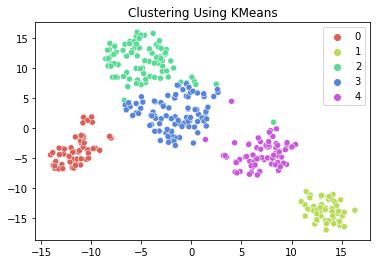

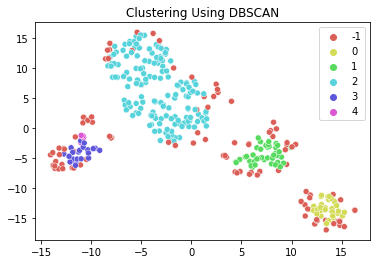

In [321]:
#Visualisation of the data using tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, random_state=1)
tsne_results = tsne.fit_transform(X)

x = tsne_results[:,0]
y = tsne_results[:,1]
target=label_db

plt.figure(1)
plt.title('Clustering Using KMeans')
sns.scatterplot( x, y, hue= label, palette=sns.color_palette("hls",5 ), data=X)
print('No in legends corrosponds to the cluster nos.')
plt.figure(2)
plt.title('Clustering Using DBSCAN')
sns.scatterplot( x, y, hue= label_db, palette=sns.color_palette("hls",6 ), data=X) 
print('-1 corrosponds to the outliers and rest are clusters')

# **Part 2** PCA

In [322]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [323]:
#unique and null values 
for col in df_pca.columns.values:
  list_vals = pd.unique(df_pca[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(df_pca[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(df_pca[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 190 unique values, 0 null entries and datatype float64
x2 has 190 unique values, 0 null entries and datatype float64
x3 has 190 unique values, 0 null entries and datatype float64
x4 has 190 unique values, 0 null entries and datatype float64
x5 has 190 unique values, 0 null entries and datatype float64
x6 has 190 unique values, 0 null entries and datatype float64
x7 has 190 unique values, 0 null entries and datatype float64


In [324]:
#Visualisation of the data
df_pca.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd72fd497d0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

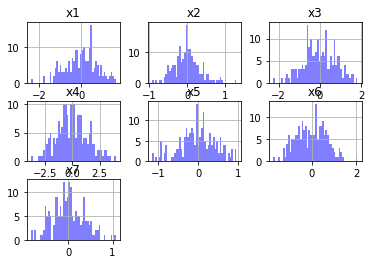

In [325]:
#Checking the data distribution of the variables
plt.figure()
df_pca.diff().hist(color="b", alpha=0.5, bins=50)

##Obs PCA
*The data given for the PCA is not cenetred across the origin \
*Variance of the data is almost unity for x4 and rest are less than 1


In [326]:
#Apply Standard Scaling
col=df_pca.columns
feature=col.tolist()

sc=StandardScaler()  #as the PCA requirement making the mean as the origin i.e shifting the axis
X=sc.fit_transform(df_pca) 
X=pd.DataFrame(X,columns=feature) #retaining the column names

## New Section

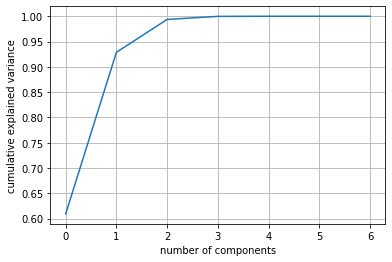

In [327]:
#Plotting of the cumulative variance vs the no. of components
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
#np.cumsum(PCA().fit(X).explained_variance_ratio_).dtype

##Obs for Exp Variance ratio
from the above transformation it is clear that the upto 3-4 principal component are holding the maximum of the energy and the variance 

#further step 
calculation of the pca for varipus  components and checking the MSE


In [328]:
#taking the no of components as 4 as observed from above that the maximum variance is been covered upto 4 components
from numpy import linalg as LA
pca = PCA(n_components=4) 
Xd = pca.fit_transform(X)
Xd_reconstructed=pca.inverse_transform(Xd)
MSE_for_reduction_upto4_components=LA.norm((X-Xd_reconstructed),None)
MSE_for_reduction_upto4_components

0.5648350714629254

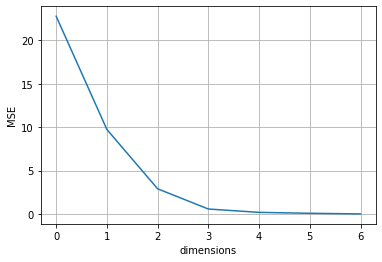

In [329]:
#MSError visualisation for the various no of dimensions for PCA
from numpy import linalg as LA
loss=[]
for i in range(1,8):
    pca = PCA(n_components=i)
    Xd = pca.fit_transform(X)
    Xd_reconstructed=pca.inverse_transform(Xd)
    total_loss=LA.norm((X-Xd_reconstructed),None)
    loss.append(total_loss)

# Plottting   
plt.ylabel('MSE')
plt.xlabel('dimensions')
plt.plot(loss)
plt.grid()


##observation reg the reconstruction error of PCA
the error is MSE is low for above 4 components \
$\therefore $ the optimal compression of the data can be taken as at 4 componets 

# **Part 3** Non-Linear Dimension Reduction

In [330]:
from sklearn.decomposition import KernelPCA
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline

##Visualisation of the data for NL dim red

In [331]:
#Visualisation of the data
# Check for unique and null values 
Xk=df_kpca #data copied in Xk
for col in Xk.columns.values:
  list_vals = pd.unique(Xk[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(Xk[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(Xk[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 190 unique values, 0 null entries and datatype float64
x2 has 190 unique values, 0 null entries and datatype float64
x3 has 190 unique values, 0 null entries and datatype float64
x4 has 190 unique values, 0 null entries and datatype float64
x5 has 190 unique values, 0 null entries and datatype float64
x6 has 190 unique values, 0 null entries and datatype float64
x7 has 190 unique values, 0 null entries and datatype float64


In [332]:
Xk.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd733161410>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

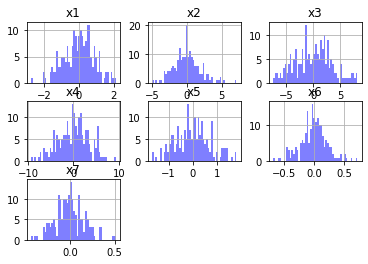

In [333]:
#Checking the data distribution of the variables
plt.figure()
Xk.diff().hist(color="b", alpha=0.5, bins=50)

In [334]:
#standardisation of the data using the standard scaler
#Apply Standard Scaling
col=df_kpca.columns
feature=col.tolist()
sc=StandardScaler()  #as the PCA requirement making the mean as the origin i.e shifting the axis
Xk=sc.fit_transform(Xk) 
Xk=pd.DataFrame(Xk,columns=feature)

##Explained variance plotting in kpca
since we dont have any modeule as explained_variance ratio in sklearn.decomposition.KernelPCA so we will first transform using the kernel using the default n_components value as none, then we will apply the PCA to the kernelised input data. 

##KPCA rbf kernel

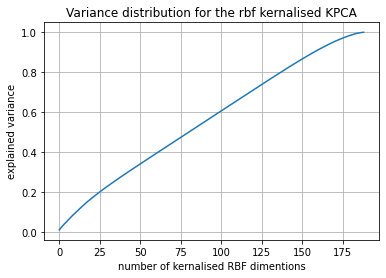

In [335]:
#
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
Xkpca_rbf = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_rbf)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the rbf kernalised KPCA')
plt.xlabel('number of kernalised RBF dimentions')
plt.ylabel('explained variance')
plt.grid()


##KPCA polynimial kernel

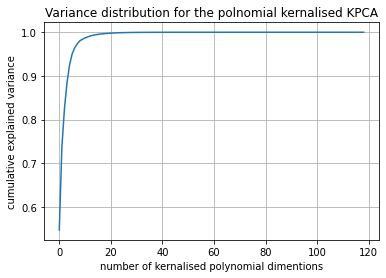

In [336]:
kpca = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=10)
Xkpca_poly = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_poly)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the polnomial kernalised KPCA')
plt.xlabel('number of kernalised polynomial dimentions')
plt.ylabel('cumulative explained variance')
plt.grid()

In [337]:
##interpretation of the epsilon
#from kneed import KneeLocator
#kn = KneeLocator(np.arange(1,120),np.cumsum(pca.explained_variance_ratio_) , curve='concave', direction='increasing')
#import scipy.interpolate as interp  
#v=np.interp(kn.knee,np.cumsum(pca.explained_variance_ratio_),np.arange(1,120) )
#print('optimum value of dimentions to be taken into account with high variancae coverage can be given as :' , v)
#print('the value had been calculated using the knee loacateor function')

###Fitting of polynomial kernel to polynomial
fitting the polynomial kernel with dimention 20
since most of the energy variance is been covered  

In [338]:
#fitting the KPCA dim reduction with optimal dimentions in the data
kpca = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=10)
Xkpca_poly = kpca.fit_transform(Xk)
pca=PCA(n_components=40).fit(Xkpca_poly)
Xkpca_trans=pca.fit_transform(Xkpca_poly)
Xkpca_trans.shape
#X2=pca.inverse_transform(Xkpca_trans)

(190, 40)

##KPCA cosine kernel

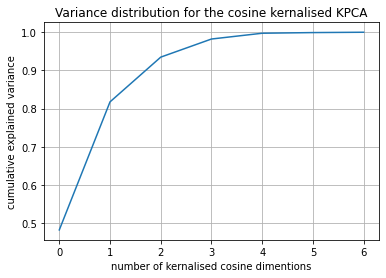

In [339]:
#KPCA with cosine kernel
kpca = KernelPCA(kernel="cosine", fit_inverse_transform=True, gamma=10)
Xkpca_cos = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_cos)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the cosine kernalised KPCA')
plt.xlabel('number of kernalised cosine dimentions')
plt.ylabel('cumulative explained variance')
plt.grid()

##Observations reg the applied Kernel
As we have applied the **rbf** **cosine** **polynomial** kernels out of which the better results were given by the polynomial kernel \
because as observed from the varince dist diagram of rbf there was no significant lower dimentions were available which were covering the higher variance ratio.


In [340]:
#rbf
#kpca = KernelPCA(kernel="polynomial", fit_inverse_transform=True, gamma=10)
#Xkpca = kpca.fit_transform(Xk)
#Xkpca_rbf.shape

#kpca_transform = kpca.fit_transform(Xkpca)
#explained_variance = np.var(Xkpca, axis=0)
#explained_variance_ratio = explained_variance / np.sum(explained_variance)
#plt.plot(explained_variance_ratio)